In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Step 2: Load the CSV file
df = pd.read_csv("Play Store Data.csv")


In [25]:
# Step 3: Preprocess columns
df['Size'] = df['Size'].replace('Varies with device', pd.NA)
df = df.dropna(subset=['Size', 'Rating', 'Reviews', 'Installs', 'Last Updated', 'Category'])

In [27]:
# Clean 'Size' column (convert to MB)
def convert_size(size):
    size = str(size).strip().upper()
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'K' in size:
        return float(size.replace('K', '')) / 1024
    else:
        return pd.NA

df['Size_MB'] = df['Size'].apply(convert_size)

In [29]:
# Clean Installs column
df['Installs'] = df['Installs'].astype(str).str.replace(r'[+,]', '', regex=True)

# Remove rows where Installs is not numeric
df = df[df['Installs'].str.isnumeric()]

# Convert to int
df['Installs'] = df['Installs'].astype(int)

# Convert Reviews
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Extract month from Last Updated
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
df['Update_Month'] = df['Last Updated'].dt.month_name()

In [31]:
# Step 4: Apply Filters
filtered_df = df[
    (df['Rating'] >= 4.0) &
    (df['Size_MB'] >= 10) &
    (df['Update_Month'] == 'January')
]


In [33]:
# Step 5: Get top 10 categories by Installs
top_categories = filtered_df.groupby('Category')['Installs'].sum().nlargest(10).index.tolist()
top_df = filtered_df[filtered_df['Category'].isin(top_categories)]

# Step 6: Aggregate for grouped bar chart
grouped = top_df.groupby('Category').agg({
    'Rating': 'mean',
    'Reviews': 'sum'
}).reset_index()

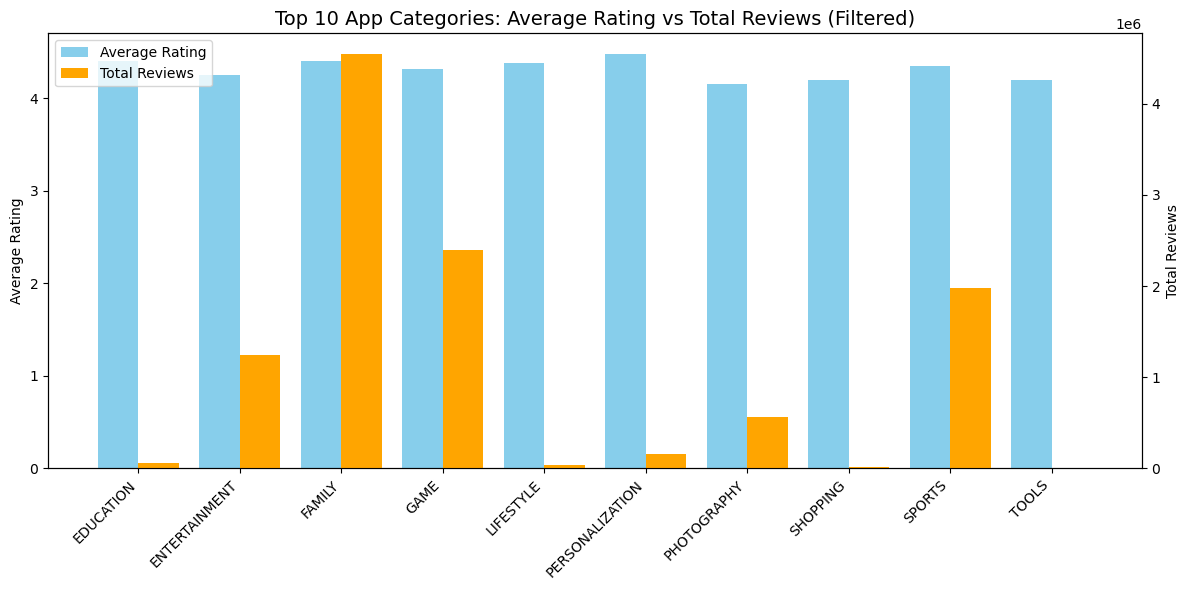

In [35]:
# Step 7: Time-based display 
now = datetime.now()
hour = now.hour
minute = now.minute

if 15 <= hour < 17:
    # Step 8: Plotting grouped bar chart
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Bar width and positions
    bar_width = 0.4
    x = range(len(grouped))

    ax1.bar([i - bar_width/2 for i in x], grouped['Rating'], width=bar_width, label='Average Rating', color='skyblue')
    ax2 = ax1.twinx()
    ax2.bar([i + bar_width/2 for i in x], grouped['Reviews'], width=bar_width, label='Total Reviews', color='orange')

    # Labels and ticks
    ax1.set_xticks(x)
    ax1.set_xticklabels(grouped['Category'], rotation=45, ha='right')
    ax1.set_ylabel('Average Rating')
    ax2.set_ylabel('Total Reviews')
    ax1.set_title('Top 10 App Categories: Average Rating vs Total Reviews (Filtered)', fontsize=14)

    # Combine legends
    bars = ax1.containers + ax2.containers
    labels = ['Average Rating', 'Total Reviews']
    plt.legend(bars, labels, loc='upper left')

    plt.tight_layout()
    plt.show()
else:
    print("This chart is only visible between 3 PM to 5 PM IST.")
